# Uso express de Pandas

En esta clase veremos diferentes métodos para procesar datos con Pandas. Algunas de estas funcionalidades son:
- Cargar datos.
- Funciones básicas para describir los datos.
- Selección y eliminación de columnas en el dataset.
- Filtrar filas (mediante condiciones o eliminan `NaN`).
- Crear/editar columnas a partir de información de otras columnas.
- Transformar una columna de categorías en numérica (_one hot encoding_).
- Uso de PCA para reducir dimensionalidad.
- Agrupar y pivotear un dataset.
- Guardar dataset actualizado en _csv_ o _json_.

## 0 - Import



El primer paso es importar la [librería](https://pandas.pydata.org/docs/index.html). Para esto hacemos

In [ ]:
import pandas as pd

## 1 - Cargar datos



Luego, el segundo paso es cargar los datos. Para esto usamos la función [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Ojo que cargaremos los datos asumiendo que el archivo está en la misma carpeta que el python (o jupyter notebook) a ejecutar.

Cómo esto es un Google Colab, primero subiremos el dataset al servidor. Para esto se recomienda ver [el siguiente enlace](https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7) donde muestran 7 formas de subir los datos. En esta clase usaremos la forma 1.

**Referencia**: los datos originales provienen de [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows) y fueron ligeramente editados dado que tenían 3 filas mal hechas.

In [ ]:
df = pd.read_csv('netflix_original_data.csv', sep=",")

## 2 - Funciones básicas para describir los datos

* [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html): permite ver las primeras filas del dataset. Podemos poner un número dentro `df.head(2)` para indicar cuantas filas ver.

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


* [`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html): permite ver el tamaño del dataset. Nos entrega una tupla con la cantidad de filas y la cantidad de columnas.

In [ ]:
df.shape

(8807, 12)

* [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html): nos entrega un resumen técnico de las columnas. Cuántos datos no nulos hay, qué tipo de dato contiene cada columna, cuánta memoria ocupa el dataset, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html): nos entrega una descripción estadística de las columnas numéricas: cuántos datos hay, su promedio, desviación, rangos, etc.

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Tambien podemos pedirle que describa las columnas con texto (aquellas que tienen un tipo de dato `object`). Con esto obtenemos información de las columnas categóricos, como la cantidad de datos no nulos, cuantos valores únicos existen, el valor más requepido y su frecuencia.

In [ ]:
df.describe(include=[object])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8800,8807,8807,8807
unique,8807,2,8807,4528,7692,748,1767,14,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## 3 - Selección y eliminación de columnas en el dataset


Para seleccionar una columna, solo es necesario poner corchetes `[]` y el nombre de la columna deseada. En este caso, queremos la columna `director`

In [ ]:
una_columna = df["director"]
# Forma válida cuando la columna tiene 1 palabra.
una_columna = df.director
una_columna.head(5)

0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

Dentro de los corchetes podemos poner una lista de string y así podremos tener un conjunto de columnas con el mismo orden que están en la lista.

In [ ]:
varias_columnas = df[["director", "country"]]
# Error típico, no poner los 2 corchetes para que sea un lista de columna
# varias_columnas = df["director", "country"]
varias_columnas.head(5)

,director,country
0,Kirsten Johnson,United States
1,NaN,South Africa
2,Julien Leclercq,NaN
3,NaN,NaN
4,NaN,India



Aqui pedimos las mismas columnas pero en otro orden.

In [ ]:
varias_columnas = df[["country", "director"]]
varias_columnas.head(5)

,country,director
0,United States,Kirsten Johnson
1,South Africa,NaN
2,NaN,Julien Leclercq
3,NaN,NaN
4,India,NaN


Si deseamos eliminar 1 columna, en vez de seleccionar todas las demás, podemos decirle al dataframe que elimine una con el método [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html). En este caso, vamos a eliminar 4 columnas. Usamos `axis=1` para indicarla a pandas que haremos la eliminación por columnas, sino por defecto buscará las filas cuyo índice sea los indicados en la lista.

In [ ]:
# Imprimir cantidad de columnas y cuales son
print(len(df.columns), df.columns)

# Crear copia sin esas 4 columnas. Ojo que axis=1 es vital para funcionar con columnas
copia = df.drop(["director", "country", "cast", "date_added"], axis=1)

# Imprimir la cantidad de columnas de la copia y cuales son
print(len(copia.columns), copia.columns)

12 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
8 Index(['show_id', 'type', 'title', 'release_year', 'rating', 'duration',
       'listed_in', 'description'],
      dtype='object')


## 4 - Filtrar filas (mediante condiciones o eliminar `NaN`)

Para poder filtrar datos, primero es necesario definir una lista de booleanos (`True`, `False`). Para esto, vamos a pedirle a pandas que compare cada valor de la columna `type` y verificar si es igual a `Movie` o no.

In [ ]:
filtro = df["type"] == 'Movie'
filtro.head(5)

0     True
1    False
2    False
3    False
4    False
Name: type, dtype: bool

Luego usamos esa lista de `True` y `False` para decirle al dataframe que seleccione solo aquellas con `True`.

In [ ]:
filtrado = df[filtro]
print(filtrado.shape)
filtrado.head(5)

(6131, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


Podemos usar la cola de chancho `~` para negar la lista (los `True` pasan a `False` y los `False` pasan a `True`)

In [ ]:
filtrado = df[~filtro]
print(filtrado.shape)
filtrado.head(5)

(2676, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


Tambien podemos usar `&` y `|` para generar esta lista de `True` y `False` con `and` y `or` respectivamente. En este ejemplo, buscaremos todas las filas cuyo `type` sea `Movie` **Y** cuyo `country` esté en la lista `["United States", "India"]`.

In [ ]:
# Multiples condiciones simultaneamente ( and )
filtrado = df[ (df["type"] == 'Movie') & (df["country"].isin(["United States", "India"])) ]

# Opción para no usar isin
# filtrado = df[ (df["type"] == 'Movie') & ((df["country"] == "United States") | (df["country"] == "India") )]

print(filtrado.shape)
filtrado.head(5)

(2951, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


In [ ]:
# Otra opción para filtrar por varias cosas con and (sin usar and)
filtrado = df[ (df["type"] == 'Movie')]
filtrado = filtrado[["country"].isin(["United States", "India"])]

print(filtrado.shape)
filtrado.head(5)

En este otro ejemplo, buscaremos todas las filas cuyo `listed_in` sea `MovieThrillers` **O** cuyo `country` esté en la lista `["United States", "India"]`.

In [ ]:
# Alguna condición se cumpla ( or )
filtrado = df[ (df["listed_in"] == 'Thrillers') | (df["country"].isin(["United States", "India"])) ]
print(filtrado.shape)
filtrado.head(5)

(3812, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...


Tambien existen métodos como [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) que permite eliminar las filas que tengan algun `nan` en sus columnas.

In [ ]:
columns = list(df.columns)
columns.remove("type")

['show_id',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
filtrado = df.dropna()
print(filtrado.shape)
filtrado.head(9)

(5332, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...


## 5 - Crear/editar columnas a partir de información de otras columnas

Otra funcionalidad interesante es crear nuevas columnas a partir de la información de otras. En este caso, vamos a crear la columna `paises` que dirá la cantiad de países que participaron en la creación de cada pelicula.

1. Primero se crea la función `contar_paises` que recibirá 1 fila del dataframe y se encarga de retornar un valor. En particular, si la columna `country` es un string (no es `NaN`), dividimos por la coma y verificamos cuantos elementos hay. En otro caso (es `NaN`), retornamos 0 porque no hay información.

2. Luego generamos una copia (con [`copy`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)) del dataset, de este modo no modificamos los datos originales.

3. Posteriormente usamos el comando [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) para decirle a pandas que aplique la función `contar_paises` a cada fila del dataset. Usamos `axis=1` para decirle que esta función se aplica a cada fila. Si usamos `axis=0`, se aplicaría a cada columna. El resultado del `apply` será una lista con los valores retornados por la función a cada fila. Esa lista la asignamos a una nueva columna llamada `paises`.

In [ ]:
def contar_paises(row):
    if isinstance(row.country, str):
        return len(row.country.split(","))
    return 0

# Otra función para contar géneros
def contar_generos(row):
    if isinstance(row.listed_in, str):
        return len(row.listed_in.split(","))
    return 0

copia = df.copy()
copia["paises"] = copia.apply(contar_paises, axis=1)
copia["generos"] = copia.apply(contar_generos, axis=1)
copia.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,paises,generos
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,3
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,2
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,3


Tambien podemos aplicar esto a una columna ya existente. En este caso, vamos a cambiar la `date_added` por solo el año en cuando fue agregado.

1. Primero se crea la función `fecha_agregado` que recibirá 1 fila del dataframe y se encarga de retornar un valor. En particular, si la columna `country` es un string (no es `NaN`), dividimos por la coma y retornamos el último elemento (que será el año). En otro caso (es `NaN`), retornamos -1 porque no hay información.

2. Luego generamos una copia (con [`copy`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)) del dataset, de este modo no modificamos los datos originales.

3. Posteriormente usamos el comando [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) para decirle a pandas que aplica la función `fecha_agregado` a cada fila del dataset. El resultado de apply será una lista con los valores retornados por cada función. Esa lista la asignamos a la columna ya existente `date_added`.

In [ ]:
def fecha_agregado(row):
    if isinstance(row.date_added, str):
        return int(row.date_added.split(",")[-1])
    return -1

copia = df.copy()
copia["date_added"] = copia.apply(fecha_agregado, axis=1)
copia.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 6 - Transformar una columna de categorías en numérica (_one hot encoding_)

Otra funcionalidad intereante es transformar una columna con datos categóricos a N columnas, donde cada una codifica la información de 1 categoría. Para esto, usamos la función [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). Esta función recibe la columna categórica a transformar. Tambien podemos usar `prefix='XXX'` para indicar que cada columna nueva debe incluir el prefijo `XXX`. En este caso, usamos el prefijo `R`

In [ ]:
df.rating.head(5)

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
Name: rating, dtype: object

In [ ]:
one_hot_encoding = pd.get_dummies(df.rating, prefix='R')
one_hot_encoding.head(5)

,R_G,R_NC-17,R_NR,R_PG,R_PG-13,R_R,R_TV-14,R_TV-G,R_TV-MA,R_TV-PG,R_TV-Y,R_TV-Y7,R_TV-Y7-FV,R_UR
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Hay casos donde la columna a transformar se compone de una lista de categorías. Por ejemplo, la lista de géneros para cada película/serie. Para esto usamos **otro** [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html?highlight=get_dummies#pandas-series-str-get-dummies) que permite identificar los valores únicos de esta columna y generar las columnas necesarias.

Para lograr esto, primero tomamos la columna que queremos transformar `df.listed_in`, luego le indicamos que transforme cada fila en un string (`df.listed_in.str`). Finalmente indicamos que debe transforarlo en _one hot encoding_ donde ocupe el separador `", "` para separar la lista de valores de cada fila.

In [ ]:
one_hot_encoding = df.listed_in.str.get_dummies(sep=", ")
one_hot_encoding.head(5)

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Finalmente, a veces es necesario guardar todos estos 0 y 1 en el dataset original. Para esto usamos la función [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) que permite unir 2 o más dataframes de pandas. Esta función recibe una lista de dataframes y se le debe indicar cómo hacer la concatención.
* `axis=0` hará que se creen nuevas filas para concatenar los datos.
* `axis=1` hará que se creen nuevas columnas para concatenar los datos.

In [ ]:
unido = pd.concat([df, one_hot_encoding], axis=1)
unido.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,0,0,0,0,0,0,0


## 7 - Uso de PCA para reducir dimensionalidad

Otra aplicación posible es aplicar reducción de dimensionalidad. Para esto, necesitamos columnas numéricas. Usaremos el método [`select_dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) para decirle que solo seleccione aquellas columnas que cumplen cierto criterio. En este caso, que sean `int`.

In [ ]:
df_solo_numeros = unido.select_dtypes(include=int)
df_solo_numeros.head(5)

,release_year,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2021,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Luego usamos la librería [`sklearn`](https://scikit-learn.org/) para importar [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), nuestra "caja negra" encargada de aplicar la reducción de dimensionalidad.

1. Primero hacemos import de PCA
2. Luego creamos nuestro objeto PCA indicandoe la cantidad de columnas a crear. En este caso 2.
3. Luego usamos el método `fit_transform` para que PCA se aplica el dataset `df_solo_numeros` y retorne el nuevo dataset compuesto por las 2 nuevas columnas.
4. Guardamos ese nuevo dataset en un DataFrame de pandas para verlo más facil.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reducido = pca.fit_transform(df_solo_numeros)
df_reducido = pd.DataFrame(reducido)

df_reducido.head(5)

,0,1
0,-5.822441,0.291571
1,-6.830399,0.808073
2,-6.829644,0.740108
3,-6.824098,0.354541
4,-6.829506,0.811413


**Extra** - normalizar la columna numérica de año y luego aplicar PCA para visualizar

In [ ]:
from sklearn.decomposition import PCA

df_solo_numeros = (df_solo_numeros - df_solo_numeros.min()) / (df_solo_numeros.max() - df_solo_numeros.min())

df_solo_numeros.head()

,release_year,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0.989583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


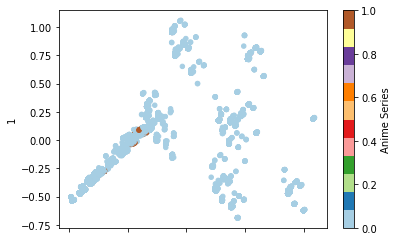

In [ ]:
pca = PCA(n_components=2)
reducido = pca.fit_transform(df_solo_numeros)
df_reducido = pd.concat([pd.DataFrame(reducido), df_solo_numeros], axis=1)

df_reducido.plot(kind="scatter", x=0, y=1, c="Anime Series", colormap='Paired')

## 8 - Agrupar y pivotear un dataset

Otra funcionalidad de interes es agrupar los datos. Para esto podemos usar [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) para agrupar el dataset en cada valor único de la columna indicada y luego solicitar que se aplique una función a ese grupo.

Para este ejemplo, vamos a agrupar por la columna `"rating"` y luego pedir que nos cuente la cantidad de valores no `NaN` en cada columna.

In [ ]:
agrupado = unido.groupby("rating").count()
agrupado.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
rating,,,,,,,,,,,,,,,,,,,,,
G,41,41,41,41,40,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
NC-17,3,3,3,2,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
NR,80,80,80,75,63,80,79,80,80,80,...,80,80,80,80,80,80,80,80,80,80
PG,287,287,287,286,279,281,287,287,287,287,...,287,287,287,287,287,287,287,287,287,287
PG-13,490,490,490,489,477,482,490,490,490,490,...,490,490,490,490,490,490,490,490,490,490


Al igual que la selección de columnas, podemos pasar una lista de columnas para que pandas agrupe por varias columnas. Nuevamente vamos a contar cuantos valores hay por grupo.

In [ ]:
agrupado = unido.groupby(["rating", "type"]).count()
agrupado.head(5)

show_id  title  director  cast  country  date_added  \
rating type                                                           
G      Movie         41     41        41    40       41          41   
NC-17  Movie          3      3         2     3        3           3   
NR     Movie         75     75        75    58       75          75   
       TV Show        5      5         0     5        5           4   
PG     Movie        287    287       286   279      281         287   

                release_year  duration  listed_in  description  ...  \
rating type                                                     ...   
G      Movie              41        41         41           41  ...   
NC-17  Movie               3         3          3            3  ...   
NR     Movie              75        75         75           75  ...   
       TV Show             5         5          5            5  ...   
PG     Movie             287       287        287          287  ...   

                TV Action & Adventure  TV Comedies  TV Dramas  TV Horror  \
rating type                                                                
G      Movie                       41           41         41         41   
NC-17  Movie                        3            3          3          3   
NR     Movie                       75           75         75         75   
       TV Show                      5            5          5          5   
PG     Movie                      287          287        287        287   

                TV Mysteries  TV Sci-Fi & Fantasy  TV Shows  TV Thrillers  \
rating type                                                                 
G      Movie              41                   41        41            41   
NC-17  Movie               3                    3         3             3   
NR     Movie              75                   75        75            75   
       TV Show             5                    5         5             5   
PG     Movie             287                  287       287           287   

                Teen TV Shows  Thrillers  
rating type                               
G      Movie               41         41  
NC-17  Movie                3          3  
NR     Movie               75         75  
       TV Show              5          5  
PG     Movie              287        287  

[5 rows x 52 columns]

Usando `as_index=False` podemos dejar el dataframe tal como lo hemos visto siempre, con índices numéricos y valores en cada columna.

In [ ]:
agrupado = unido.groupby(["rating", "type"], as_index=False).count()
agrupado.head(5)

,rating,type,show_id,title,director,cast,country,date_added,release_year,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,G,Movie,41,41,41,40,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
1,NC-17,Movie,3,3,2,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,NR,Movie,75,75,75,58,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
3,NR,TV Show,5,5,0,5,5,4,5,5,...,5,5,5,5,5,5,5,5,5,5
4,PG,Movie,287,287,286,279,281,287,287,287,...,287,287,287,287,287,287,287,287,287,287


Otra función que nos ayuda con la agrupación de datos es [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html) donde le pides agrupar por columnas y filas (nuestras llaves de la matriz a construir), pero la diferencua es que `pivot_table` solicita el nombre de una columna para utilizar en cada grupo. Además requiere de definir una función de agregación para saber como transformar cada grupo en un valor a poner en la celda.

En este caso, vamos a agrupar los datos para que cada fila sea un valor de `rating` distinto, cada columna sea un valor de `type` distinto, y para cada casilla ocupar los datos del la columna `Thrillers`. Recordar que esta columna la hicimos con _one hot encoding_ por lo tanto esta columna tiene un 1 si la serie/pelicula es de dicho género o 0 en otro caso. Finalmente, usamos `aggfunc=sum` para indicar que cada grupo identificado lo reduzca a la sumatoria de sus valores.

**Nota**: esta función es típicamente utilizada para generar mapas de calor (en dataset tabulares, no en geográficos).

In [ ]:
table = pd.pivot_table(unido, values='Thrillers', index=["rating"], 
                       columns=['type'], aggfunc=sum)

table.head(5)

type,Movie,TV Show
rating,,
G,0.0,NaN
NC-17,0.0,NaN
NR,4.0,0.0
PG,2.0,NaN
PG-13,54.0,NaN


Puede pasar que se quiere hacer algo más personalizado a cada grupo encontrado. Para ejemplificar, primero vamos a crear una columna llamada `"RATING_PROMEDIO"` que será un número aleatorio entre 1 y 10 en cada fila. Vamos a simular que ese número es el rating promedio de cada película/serie.

In [ ]:
import random

def random_ranting(row):
    return random.randint(1, 10)

con_ratings = unido.copy()
con_ratings["RATING_PROMEDIO"] = con_ratings.apply(random_ranting, axis=1)
con_ratings.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,RATING_PROMEDIO
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,8
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,1,0,0,0,0,0,7
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,5
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,2
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,1,0,0,0,0,0,0,0,0,4


Ahora vamos a calcular el rating promedio para cada grupo. Para esto se crea una función `promedio` que recibe cada grupo y retorna un valor único. En este caso, retornará el promedio. Luego, en `aggfunc` le indicamos que ocupe dicha función.

In [ ]:
def promedio(grupo):
    return grupo.mean()

table = pd.pivot_table(con_ratings, values='RATING_PROMEDIO', index=["rating"],
                       columns=['type'], aggfunc=promedio)

table.head(5)

type,Movie,TV Show
rating,,
G,9.0,NaN
NC-17,5.0,NaN
NR,9.0,4.0
PG,9.0,NaN
PG-13,9.0,NaN


Notar que hay grupos con `NaN`, esto es porque para esa combinación de llaves (`G` - `TV show` por ejemplo) no se encontró ningún dato y por lot anto es un grupo sin información.

## 9 - Guardar dataset actualizado en csv o json

Finalmente, vamos a guardar el dataset `con_ratings` que fue preprocesado con diferentes cosas. Primero revisemos el dataset.

In [ ]:
con_ratings.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,RATING_PROMEDIO
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,8
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,1,0,0,0,0,0,7


* [`to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html): este método nos permite guardar un archivo csv de los datos. Agregamos `index=False` para que no guarde el índice (0, 1, 2, 3) de cada fila.

In [ ]:
con_ratings.to_csv("con_ratings.csv", index=False)

* [`to_json`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html): este método nos permite guardar un archivo json de los datos. Agregamos `orient=records` para que el formato de guardado sea una lista de diccionarios, donde cada diccionario es de la forma:
```
{
    columna_1: valor_1,
    columns_2: valor_2,
    ...
    colmna_n: valor_n
}
```

Además usamos `indent=4` para agregar 4 espacios como indentación al momento de escribir el archivo.

In [ ]:
con_ratings.to_json("con_ratings.json", orient="records", indent=4)

Vamos a guardar una version chiquita para previsualizar rápido.

In [ ]:
con_ratings.head(10).to_csv("con_ratings_chico.csv", index=False)

In [ ]:
con_ratings.head(10).to_json("con_ratings_chico.json", orient="records", indent=4)

## 10 - Extra

Pandas es lejos la librería que más se utiliza para preprocesar datos. En esta clase vimos las funciones más tipicas que se ocupan, pero hay muchas funcionalidades más que no pudimos ver. Por ejemplo:

- Visualizar dataframe con el método [`plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

- Otras formas de unir dataframe (no solo concatenarlos) con el método [`join`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) o [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

- Selección de filas específicas con [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc), [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc), [`at`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at)

- Otros métodos para cargar o guardar datos: https://pandas.pydata.org/docs/reference/io.html

- Trabajar con los índices de una tabla: https://pandas.pydata.org/docs/reference/indexing.html

- Muchos otros métodos para agrupar: https://pandas.pydata.org/docs/reference/groupby.html

- Métodos de pandas para testear o revisar los diferentes errores de pandas: https://pandas.pydata.org/docs/reference/testing.html